In [2]:
source('helpers.R')
source('../utils.R')
loadLibraries()

In [3]:
df.combined = getCombinedDataSet()
df.lot_frontage = df.combined %>% filter(!is.na(LotFrontage))
df.lot_frontage.cutted = df.lot_frontage %>% filter(LotFrontage < 130)
df.lot_frontage.na = df.combined %>% filter(is.na(LotFrontage))
df.train = getTrainData()

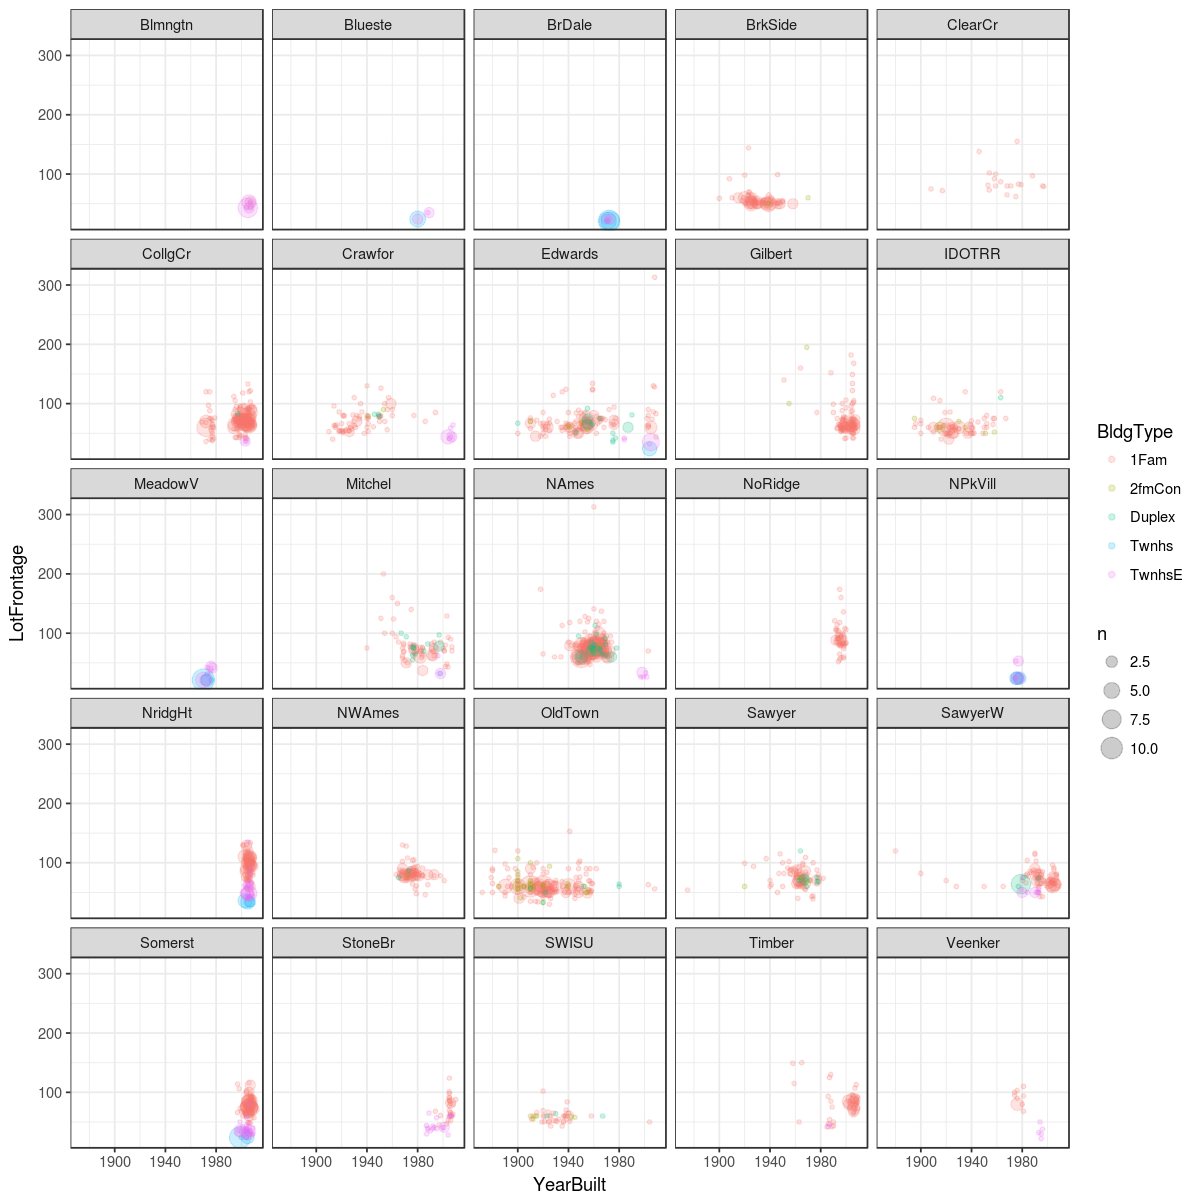

In [4]:
options(repr.plot.width = 10, repr.plot.height = 10)

ggplot(df.lot_frontage, aes(x=YearBuilt, y=LotFrontage)) +
    geom_count(aes(colour = BldgType), alpha=0.2) +
    facet_wrap(~Neighborhood) +
    theme_bw()

# Blmngtn

In [40]:
plotPatch = function (neig, df.neig, df.train, colourVar) {
    g = ggplot() +
    geom_count(data = df.neig, 
               aes(x=LotAreaSqrt, y=LotFrontage, colour=eval(colourVar)), 
               alpha=0.4) +
    geom_point(data = df.train %>% 
                       filter(Neighborhood == neig) %>% 
                       filter(is.na(LotFrontage)),
               aes(x=LotAreaSqrt, y=LotFrontageCalc),
               alpha=0.8, shape=4, size=1) +
    theme_bw()
    g
}

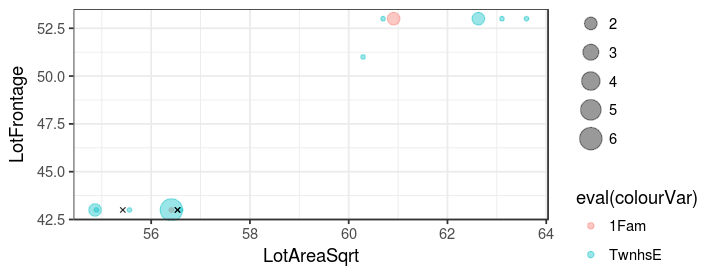

In [41]:
options(repr.plot.width = 6, repr.plot.height = 2.3)

source("lot_frontage_fix_na.R")

df.neig = getByNeighborhood('Blmngtn')
df.train = getTrainData()
df.train = FixNaLotFrontage.Blmngtn(df.train)

plotPatch('Blmngtn', df.neig, df.train, quote(BldgType))

# Blueste

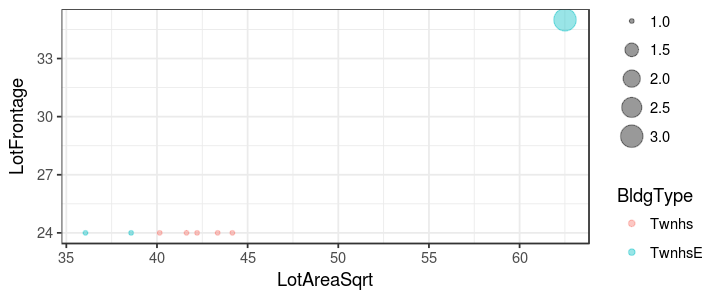

In [24]:
options(repr.plot.width = 6, repr.plot.height = 2.5)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'Blueste'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_count(aes(colour = BldgType), alpha=0.4) +
    theme_bw()

# BrDale

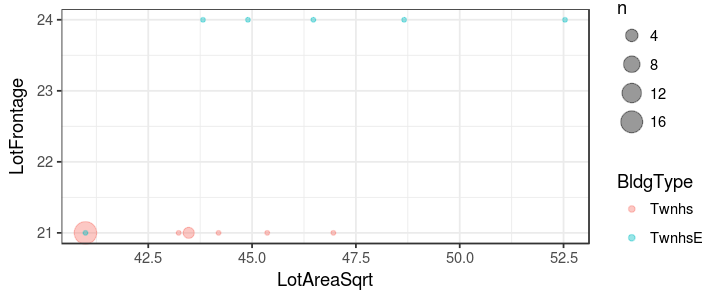

In [16]:
options(repr.plot.width = 6, repr.plot.height = 2.5)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'BrDale'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_count(aes(colour = BldgType), alpha=0.4) +
    theme_bw()

# BrkSide

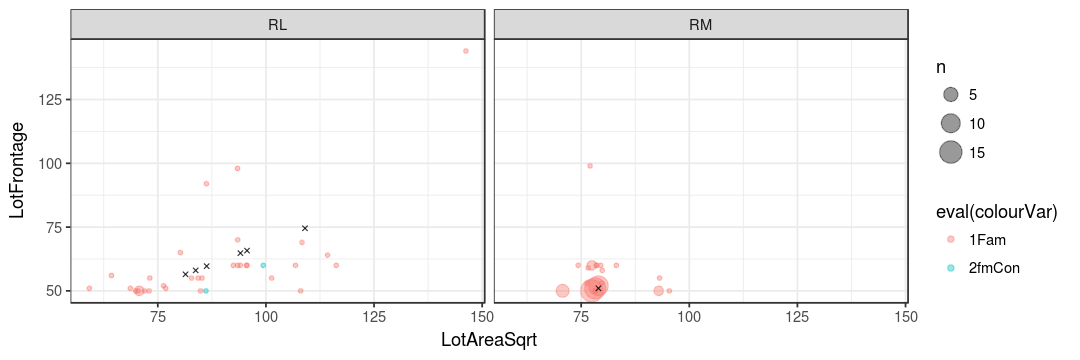

In [43]:
options(repr.plot.width = 9, repr.plot.height = 3)

source("lot_frontage_fix_na.R")

df.train = getTrainData()
df.neig = getByNeighborhood('BrkSide')
df.train = FixNaLotFrontage.BrkSide(df.train, df.neig)

plotPatch('BrkSide', df.neig, df.train, quote(BldgType)) + facet_wrap(~MSZoning)

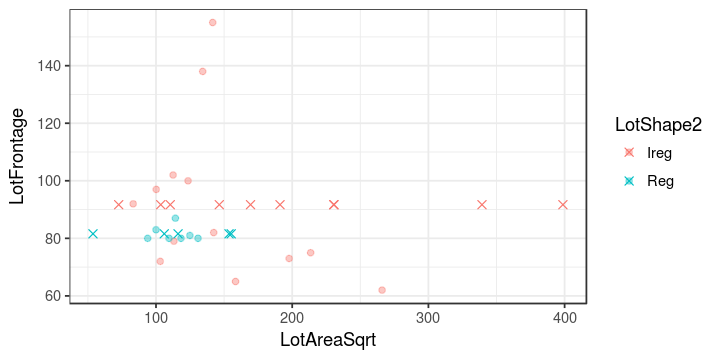

In [45]:
options(repr.plot.width = 6, repr.plot.height = 3)

source("lot_frontage_fix_na.R")

df.train = getTrainData()
df.neig = getByNeighborhood('ClearCr')
df.train = FixNaLotFrontage.ClearCr(df.train, df.neig)

ggplot() +
    geom_point(data = df.neig, 
               aes(x=LotAreaSqrt, y=LotFrontage, colour=LotShape2), 
               alpha=0.4) +
    geom_point(data = df.train %>% 
                       filter(Neighborhood == 'ClearCr') %>% 
                       filter(is.na(LotFrontage)),
               aes(x=LotAreaSqrt, y=LotFrontageCalc, colour=LotShape2),
               alpha=1, shape=4, size=2) +
    theme_bw()

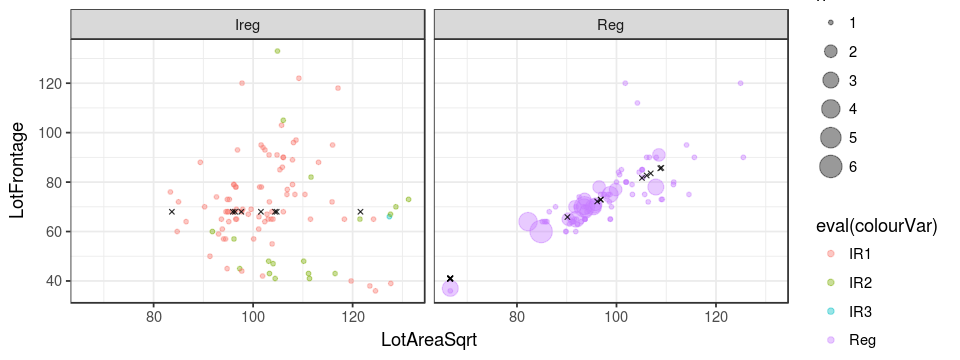

In [48]:
options(repr.plot.width = 8, repr.plot.height = 3)

source("lot_frontage_fix_na.R")

df.train = getTrainData()
df.neig = getByNeighborhood('CollgCr')
df.train = FixNaLotFrontage.CollgCr(df.train, df.neig)

plotPatch('CollgCr', df.neig, df.train, quote(LotShape)) + facet_wrap(~LotShape2)

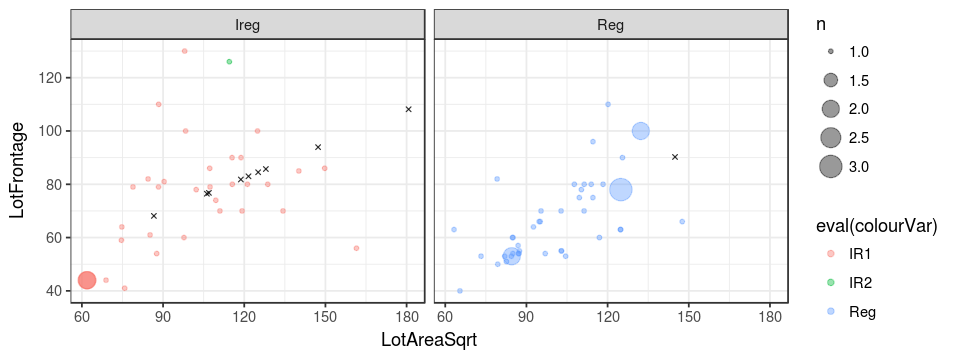

In [52]:
options(repr.plot.width = 8, repr.plot.height = 3)

source("lot_frontage_fix_na.R")

df.train = getTrainData()
df.neig = getByNeighborhood('Crawfor')
df.train = FixNaLotFrontage.Crawfor(df.train, df.neig)

plotPatch('Crawfor', df.neig, df.train, quote(LotShape)) + facet_wrap(~LotShape2)

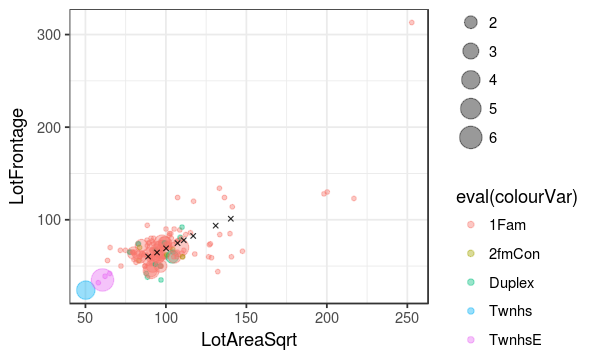

In [55]:
options(repr.plot.width = 5, repr.plot.height = 3)

source("lot_frontage_fix_na.R")

df.train = getTrainData()
df.neig = getByNeighborhood('Edwards')
df.train = FixNaLotFrontage.Edwards(df.train, df.neig)

plotPatch('Edwards', df.neig, df.train, quote(BldgType))

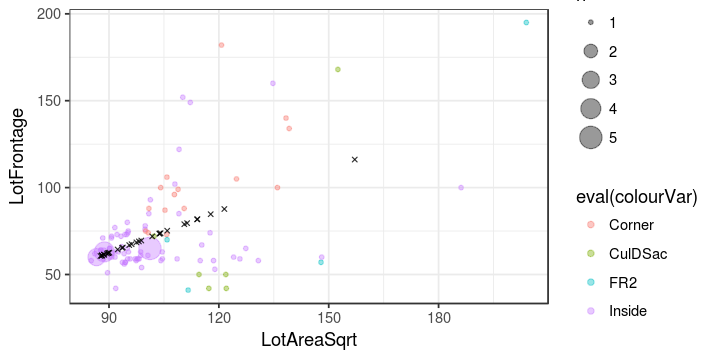

In [59]:
options(repr.plot.width = 6, repr.plot.height = 3)

source("lot_frontage_fix_na.R")

df.train = getTrainData()
df.neig = getByNeighborhood('Gilbert')
df.train = FixNaLotFrontage.Gilbert(df.train, df.neig)

plotPatch('Gilbert', df.neig, df.train, quote(LotConfig))

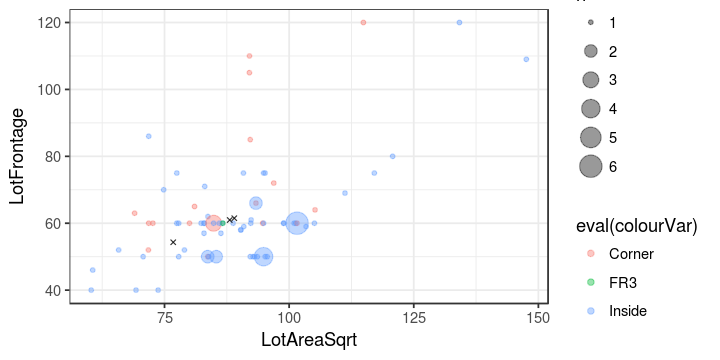

In [64]:
options(repr.plot.width = 6, repr.plot.height = 3)

source("lot_frontage_fix_na.R")

df.train = getTrainData()
df.neig = getByNeighborhood('IDOTRR')
df.train = FixNaLotFrontage.IDOTRR(df.train, df.neig)

plotPatch('IDOTRR', df.neig, df.train, quote(LotConfig))

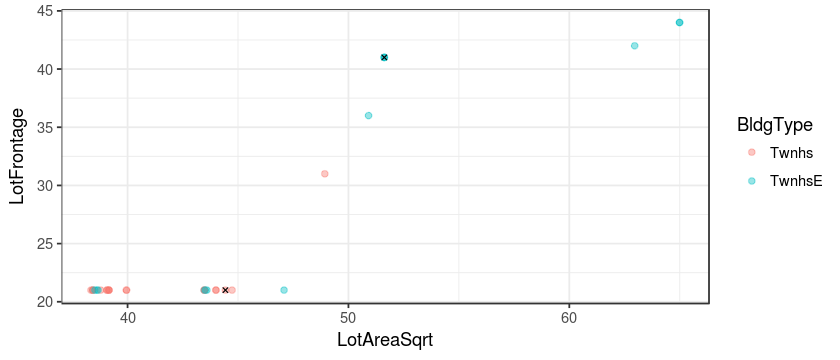

In [61]:
options(repr.plot.width = 7, repr.plot.height = 3)

source("lot_frontage_fix_na.R")

df.data.MeadowV = df.lot_frontage %>% filter(Neighborhood == 'MeadowV')
df.train = df.combined %>% filter(dataSource == "train") %>% mutate(LotFrontageCalc = NA)

df.train = FixNaLotFrontage.MeadowV(df.train = df.train)

ggplot() +
    geom_point(data=df.data.MeadowV, 
               aes(x=LotAreaSqrt, y=LotFrontage, colour=BldgType), 
               alpha=0.4) +
    geom_point(data=df.train %>% filter(Neighborhood == 'MeadowV') %>% filter(is.na(LotFrontage)),
               aes(x=LotAreaSqrt, y=LotFrontageCalc),
               alpha=1, shape=4, size=1) +
    theme_bw()

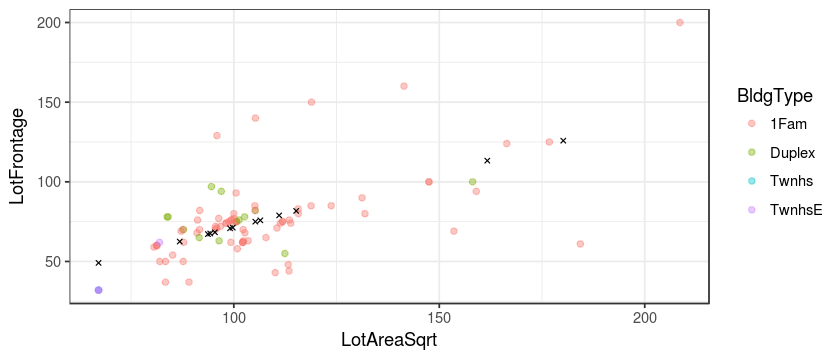

In [41]:
options(repr.plot.width = 7, repr.plot.height = 3)

source("lot_frontage_fix_na.R")

df.train = getTrainData()
df.Mitchel = getByNeighborhood('Mitchel')

df.train = FixNaLotFrontage.Mitchel(df.train, df.Mitchel)

ggplot() +
    geom_point(data=df.Mitchel, 
               aes(x=LotAreaSqrt, y=LotFrontage, colour=BldgType), 
               alpha=0.4) +
    geom_point(data=df.train %>% filter(Neighborhood == 'Mitchel') %>% filter(is.na(LotFrontage)),
               aes(x=LotAreaSqrt, y=LotFrontageCalc),
               alpha=1, shape=4, size=1) +
    theme_bw()

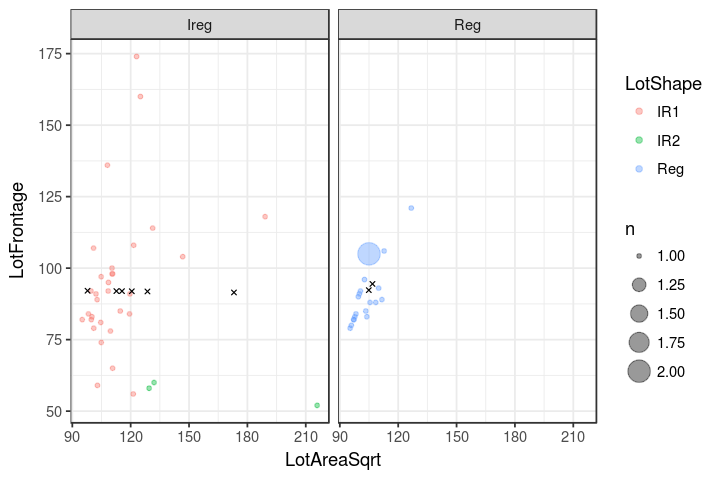

In [46]:
options(repr.plot.width = 6, repr.plot.height = 4)

source("lot_frontage_fix_na.R")

df.train = getTrainData()
df.NoRidge = getByNeighborhood('NoRidge')

df.train = FixNaLotFrontage.NoRidge(df.train, df.NoRidge)

ggplot() +
    geom_count(data=df.NoRidge, 
               aes(x=LotAreaSqrt, y=LotFrontage, colour=LotShape), 
               alpha=0.4) +
    geom_point(data=df.train %>% filter(Neighborhood == 'NoRidge') %>% filter(is.na(LotFrontage)),
               aes(x=LotAreaSqrt, y=LotFrontageCalc),
               alpha=1, shape=4, size=1) +
     facet_wrap(~LotShape2) +
     theme_bw()

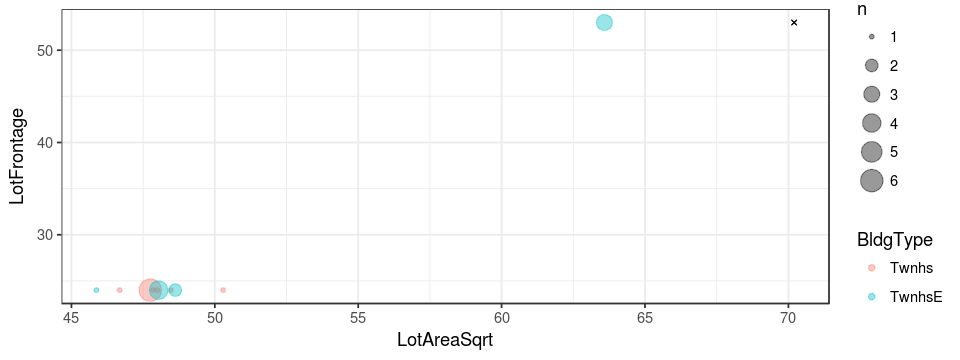

In [52]:
options(repr.plot.width = 8, repr.plot.height = 3)

source("lot_frontage_fix_na.R")

df.train = getTrainData()
df.nei = getByNeighborhood('NPkVill')

df.train = FixNaLotFrontage.NPkVill(df.train)

ggplot() +
    geom_count(data = df.nei, 
               aes(x=LotAreaSqrt, y=LotFrontage, colour=BldgType), 
               alpha=0.4) +
    geom_point(data = df.train %>% 
                      filter(Neighborhood == 'NPkVill') %>% 
                      filter(is.na(LotFrontage)),
               aes(x=LotAreaSqrt, y=LotFrontageCalc),
               alpha=0.8, shape=4, size=1) +
    theme_bw()

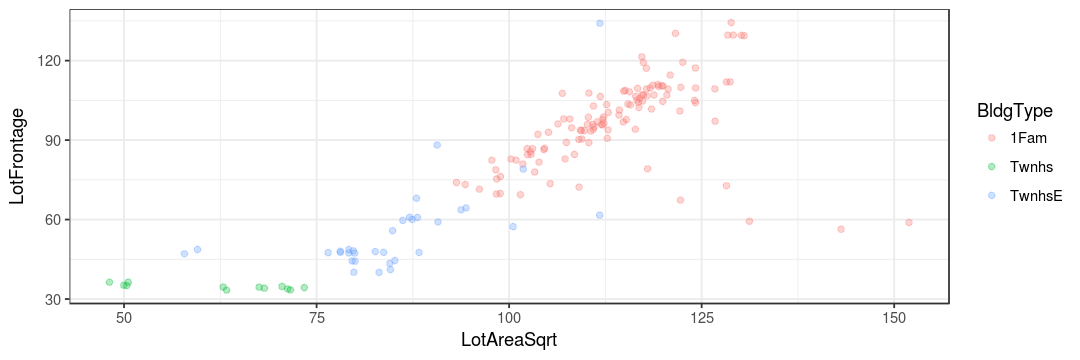

In [61]:
options(repr.plot.width = 9, repr.plot.height = 3)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'NridgHt'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    #facet_wrap(~BldgType) +
    theme_bw()

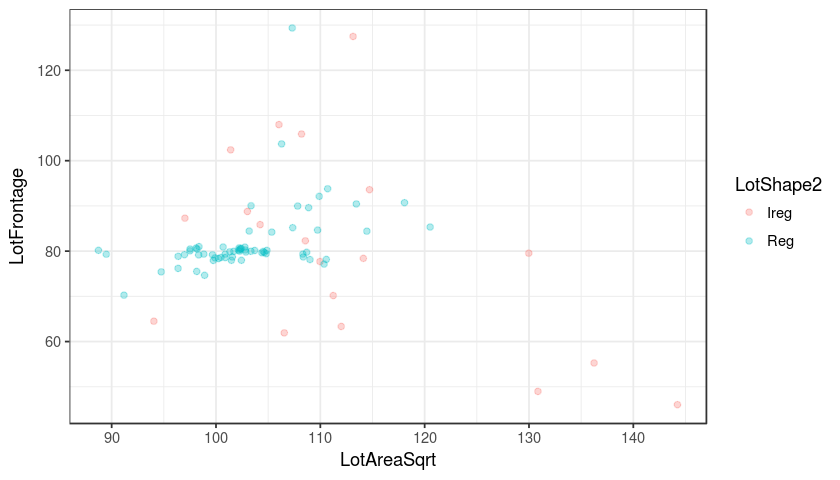

In [53]:
options(repr.plot.width = 7, repr.plot.height = 4)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'NWAmes'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = LotShape2), alpha=0.3, width=1, height=1) +
    theme_bw()

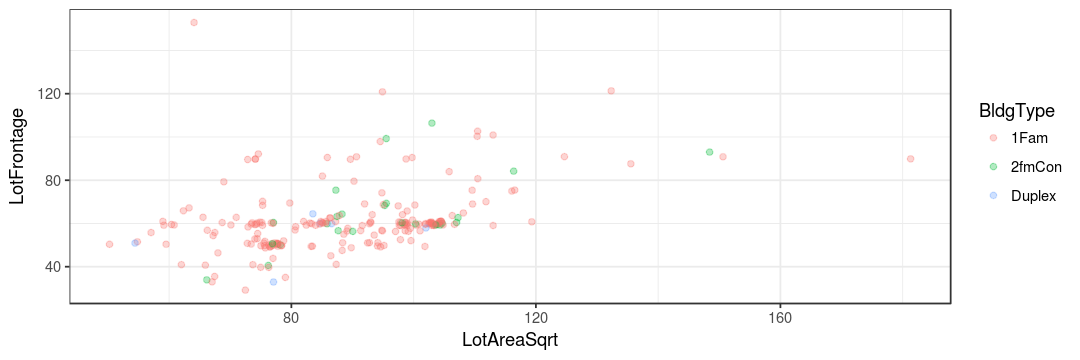

In [56]:
options(repr.plot.width = 9, repr.plot.height = 3)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'OldTown'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    theme_bw()

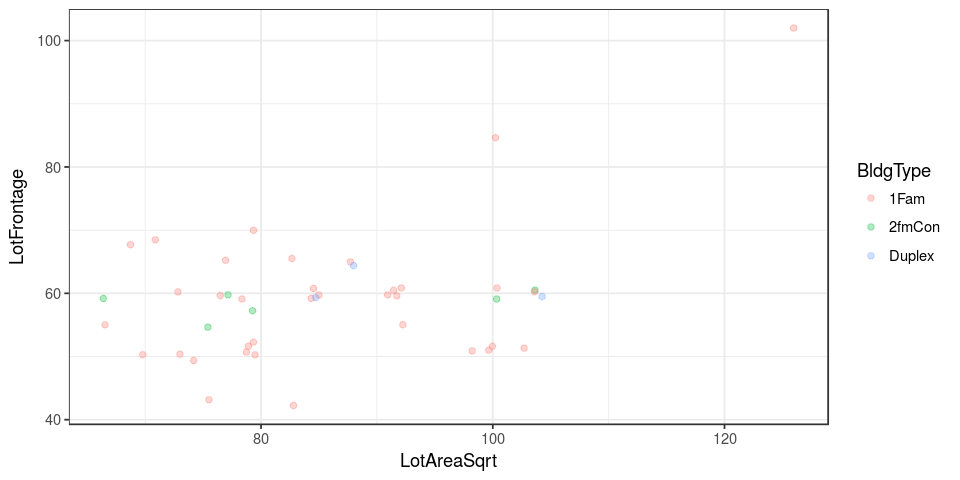

In [287]:
options(repr.plot.width = 8, repr.plot.height = 4)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'SWISU'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    theme_bw()

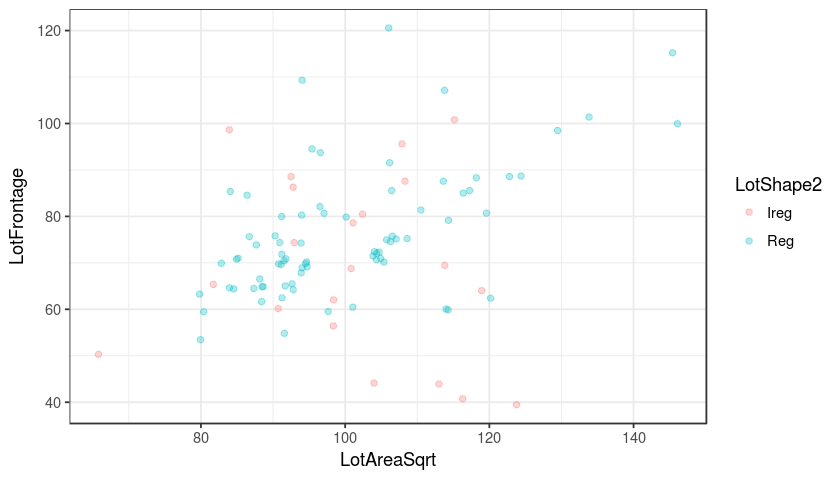

In [57]:
options(repr.plot.width = 7, repr.plot.height = 4)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'Sawyer'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = LotShape2), alpha=0.3, width=1, height=1) +
    theme_bw()

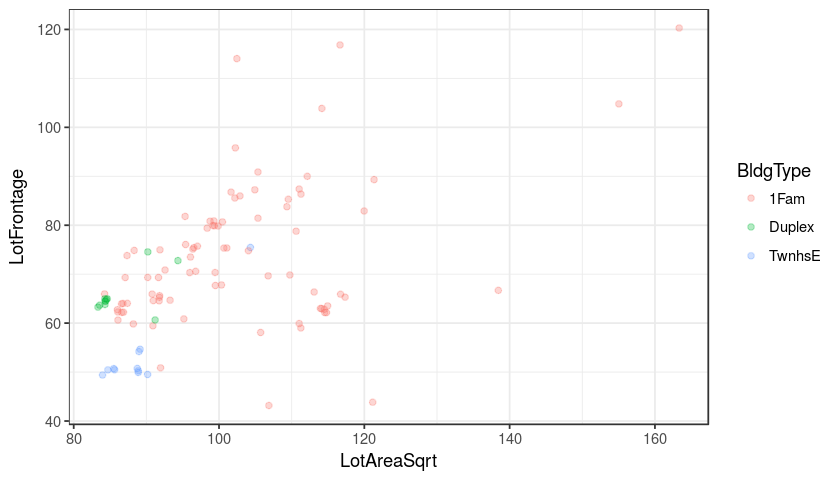

In [304]:
options(repr.plot.width = 7, repr.plot.height = 4)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'SawyerW'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    theme_bw()

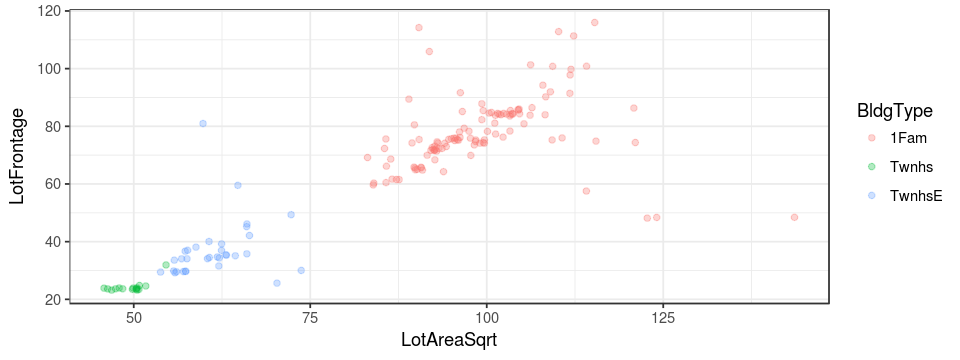

In [59]:
options(repr.plot.width = 8, repr.plot.height = 3)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'Somerst'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    #facet_wrap(~BldgType) +
    theme_bw()

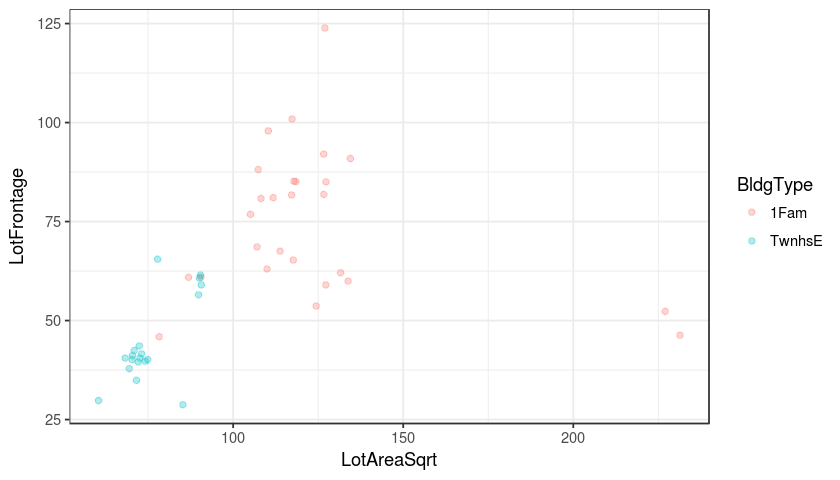

In [62]:
options(repr.plot.width = 7, repr.plot.height = 4)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'StoneBr'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    theme_bw()

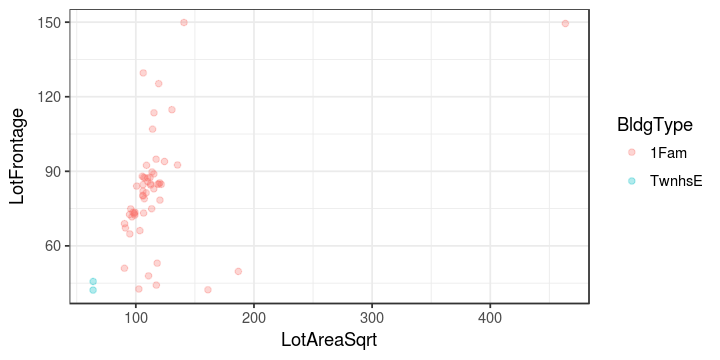

In [63]:
options(repr.plot.width = 6, repr.plot.height = 3)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'Timber'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    theme_bw()

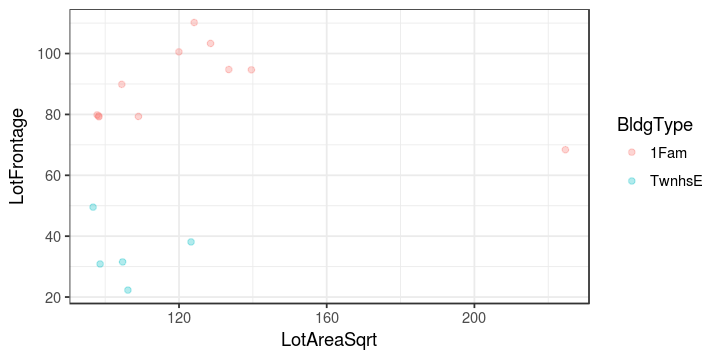

In [64]:
options(repr.plot.width = 6, repr.plot.height = 3)

ggplot(df.lot_frontage %>% filter(Neighborhood == 'Veenker'), aes(x=LotAreaSqrt, y=LotFrontage)) +
    geom_jitter(aes(colour = BldgType), alpha=0.3, width=1, height=1) +
    theme_bw()